<a href="https://colab.research.google.com/github/TrongHvDev/AI/blob/main/Homework_week9/fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np

In [55]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

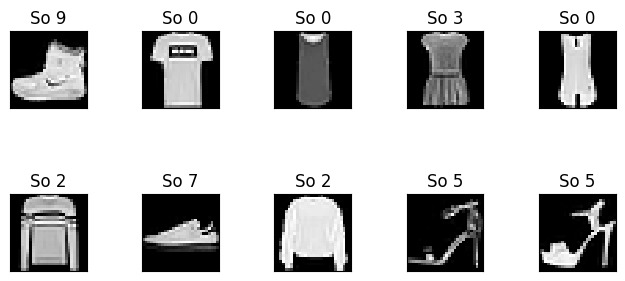

In [31]:
for i in range(10):
  plt.subplot(3, 5, i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap = 'gray', interpolation = 'none')
  plt.title('So {}'.format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

In [56]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [57]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [58]:
x_train = x_train.reshape(x_train.shape[0], 28 * 28)
x_test = x_test.reshape(x_test.shape[0], 28 * 28)

In [59]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [60]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4779 - accuracy: 0.8279 - val_loss: 0.4207 - val_accuracy: 0.8479
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3607 - accuracy: 0.8674 - val_loss: 0.3994 - val_accuracy: 0.8540
Epoch 3/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3255 - accuracy: 0.8794 - val_loss: 0.3611 - val_accuracy: 0.8716
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3037 - accuracy: 0.8875 - val_loss: 0.3737 - val_accuracy: 0.8650
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2836 - accuracy: 0.8942 - val_loss: 0.3501 - val_accuracy: 0.8715
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2708 - accuracy: 0.8982 - val_loss: 0.3265 - val_accuracy: 0.8827
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2559 - accuracy: 0.9031 - val_loss: 0.3363 -

In [64]:
model.save('fashion_mnist.h5')

1/1 [==============================] - 0s 76ms/step


array([9])

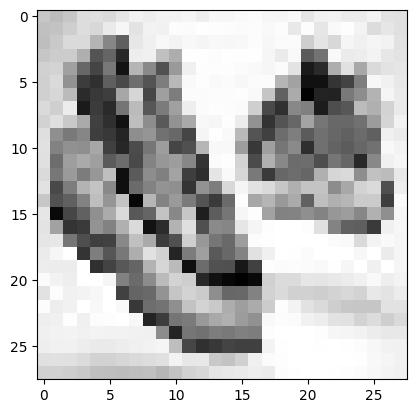

In [74]:
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
import numpy as np
from keras.models import load_model

model = load_model('fashion_mnist.h5')
img = load_img('shoe.jpg', target_size = (28,28))
img = img.convert('L') # convert to gray image
plt.imshow(img, cmap= 'gray')
img = img_to_array(img)
img = img.reshape(1, 28*28)
img = img.astype('float32')
img = img / 255
np.argmax(model.predict(img),axis = -1)